In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import PIL
from tensorflow.keras import models , layers


plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['font.size'] = 16



In [3]:
train_path_fake =[]

path_1 = r"C:\\Users\\lizha\\Desktop\\maddata\\archive\\train\\FAKE\\\\"
# Creating path for every picture
for i in range(1000,6000):
    a = '{}{}.jpg'.format(path_1, i)
    # for specific format such like "1000(2)"
    train_path_fake.append(a)
    for j in range(2,11):
        b = '{}{} ({}).jpg'.format(path_1, i, j)
        train_path_fake.append(b)


In [4]:
train_path_real=[]

path_2 = r"C:\\Users\\lizha\\Desktop\\maddata\\archive\\train\\REAL\\\\"

#Since the name order for real is from 0001,therefore we need to create 4 different loop for eachkind of name
for i in range(0,10):
    c = '{}000{}.jpg'.format(path_2, i)
    train_path_real.append(c)
    for j in range(2,11):
        d = '{}000{} ({}).jpg'.format(path_2, i,j)
        train_path_real.append(d)

for i in range(10,100):
    e = '{}00{}.jpg'.format(path_2, i)
    train_path_real.append(e)
    for j in range(2,11):
        f = '{}00{} ({}).jpg'.format(path_2, i,j)
        train_path_real.append(f)

for i in range(100,1000):
    g = '{}0{}.jpg'.format(path_2, i)
    train_path_real.append(g)
    for j in range(2,11):
        h = '{}0{} ({}).jpg'.format(path_2, i,j)
        train_path_real.append(h)

for i in range(1000,5000):
    k = '{}{}.jpg'.format(path_2, i)
    train_path_real.append(k)
    for j in range(2,11):
        l = '{}{} ({}).jpg'.format(path_2, i,j)
        train_path_real.append(l)

In [5]:
#turn the path to dataframe and set it's label
df_train_fake = pd.DataFrame(train_path_fake)
df_train_fake.columns = ['path']
df_train_fake['label'] = 0

df_train_real = pd.DataFrame(train_path_real)
df_train_real.columns = ['path']
df_train_real['label'] = 1

#Concat 2 df for future use
df_train = pd.concat((df_train_fake, df_train_real), axis = 0 )

In [6]:
test_path_fake =[]
#Similar percedure
path_3 = r"C:\Users\lizha\Desktop\maddata\archive\test\FAKE\\"

for i in range(0,1000):
    m = '{}{}.jpg'.format(path_3, i)
    test_path_fake.append(m)
    for j in range(2,11):
        n = '{}{} ({}).jpg'.format(path_3, i, j)
        test_path_fake.append(n)

In [7]:
test_path_real =[]
#Similar percedure
path_4 = r"C:\Users\lizha\Desktop\maddata\archive\test\REAL\\"

for i in range(0,10):
    o = '{}000{}.jpg'.format(path_4, i)
    test_path_real.append(o)
    for j in range(2,11):
        p = '{}000{} ({}).jpg'.format(path_4, i,j)
        test_path_real.append(p)

for i in range(10,100):
    q = '{}00{}.jpg'.format(path_4, i)
    test_path_real.append(q)
    for j in range(2,11):
        r = '{}00{} ({}).jpg'.format(path_4, i,j)
        test_path_real.append(r)

for i in range(100,1000):
    s = '{}0{}.jpg'.format(path_4, i)
    test_path_real.append(s)
    for j in range(2,11):
        t = '{}0{} ({}).jpg'.format(path_4, i,j)
        test_path_real.append(t)


In [8]:
#Similar percedure
df_test_fake = pd.DataFrame(test_path_fake)
df_test_fake.columns = ['path']
df_test_fake['label'] = 0

df_test_real = pd.DataFrame(test_path_real)
df_test_real.columns = ['path']
df_test_real['label'] = 1

df_test = pd.concat((df_test_fake, df_test_real), axis = 0 ) 

df_test

,path,label
0,C:\Users\lizha\Desktop\maddata\archive\test\FA...,0
1,C:\Users\lizha\Desktop\maddata\archive\test\FA...,0
2,C:\Users\lizha\Desktop\maddata\archive\test\FA...,0
3,C:\Users\lizha\Desktop\maddata\archive\test\FA...,0
4,C:\Users\lizha\Desktop\maddata\archive\test\FA...,0
...,...,...
9995,C:\Users\lizha\Desktop\maddata\archive\test\RE...,1
9996,C:\Users\lizha\Desktop\maddata\archive\test\RE...,1
9997,C:\Users\lizha\Desktop\maddata\archive\test\RE...,1
9998,C:\Users\lizha\Desktop\maddata\archive\test\RE...,1


In [9]:
import os
os.path.exists(r'C:\\Users\\lizha\\Desktop\\maddata\\archive\\train\\FAKE\\\\1000 (2).jpg')

True

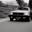

In [10]:
# with open("MadData/CIFAKE/train/FAKE") as image_path:
#   cv2.imread(image_path)


PIL.Image.open(r'C:\\Users\\lizha\\Desktop\\maddata\\archive\\train\\FAKE\\\\1000 (2).jpg')

In [11]:
#Using cv2 to read image and preprocess
image_df = []
for image in df_train['path']:
    # img not empty
    
    img = cv2.imread(image)
    resized = cv2.resize(img,(32,32))
    image_df.append(resized)
image_array = np.array(image_df)
X_train = image_array/255
X_train.ndim

4

In [12]:
image_ds = []
for image in df_test['path']:
    imge = cv2.imread(image)
    resize = cv2.resize(imge,(32,32))
    image_ds.append(resize)
image_arry = np.array(image_ds)
X_test = image_arry/255
X_test.ndim

4

In [13]:
y_train = df_train['label']
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [14]:
y_test = df_test['label']
y_test.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [15]:

model = models.Sequential([
    layers.Conv2D(filters = 80 , kernel_size = (3,3),activation = 'relu',input_shape= (32,32,3)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(filters = 40 , kernel_size = (3,3),activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(filters = 20 , kernel_size = (3,3),activation = 'relu'),
    layers.MaxPool2D((2,2)),

    layers.Flatten(),
    layers.Dense(10,activation = 'relu'),
    layers.Dense(2,activation = 'sigmoid'),
                         ])

model.compile(
    optimizer = 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
             )

model.fit(X_train,y_train, epochs = 5)






Epoch 1/5


3125/3125 [==============================] - 23s 7ms/step - loss: 0.3875 - accuracy: 0.8240
Epoch 2/5
3125/3125 [==============================] - 22s 7ms/step - loss: 0.2623 - accuracy: 0.8926
Epoch 3/5
3125/3125 [==============================] - 21s 7ms/step - loss: 0.2277 - accuracy: 0.9086
Epoch 4/5
3125/3125 [==============================] - 22s 7ms/step - loss: 0.2066 - accuracy: 0.9172
Epoch 5/5
3125/3125 [==============================] - 22s 7ms/step - loss: 0.1944 - accuracy: 0.9231


In [16]:
model.evaluate(X_test,y_test)

625/625 [==============================] - 2s 3ms/step - loss: 0.1886 - accuracy: 0.9226


[0.18857745826244354, 0.9226499795913696]

In [17]:
y_pred  = model.predict(X_test)
y_pred_label = [np.argmax(i) for i in y_pred]
y_pred_label[:5]

625/625 [==============================] - 2s 3ms/step


[0, 0, 0, 0, 0]

In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test , y_pred_label)

In [19]:
from sklearn.metrics import classification_report

print('Classification Report     : \n\n\n' , classification_report(y_test,y_pred_label))


Classification Report     : 


               precision    recall  f1-score   support

           0       0.93      0.91      0.92     10000
           1       0.92      0.93      0.92     10000

    accuracy                           0.92     20000
   macro avg       0.92      0.92      0.92     20000
weighted avg       0.92      0.92      0.92     20000



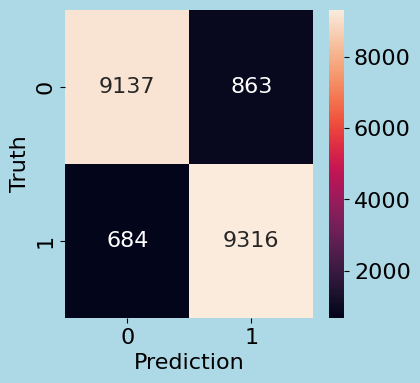

In [20]:
import seaborn as sn


plt.figure(figsize=(4, 4), facecolor='lightblue', edgecolor='darkblue')
sn.heatmap(cm , annot= True, fmt="d")
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show()

In [21]:
model


In [22]:
from tensorflow.keras.models import load_model
from keras.models import load_model

model.save('model/ai_imageclassifier', save_format='tf')

loaded_model = tensorflow.keras.models.load_model('model/ai_imageclassifier')

INFO:tensorflow:Assets written to: model/ai_imageclassifier\assets


INFO:tensorflow:Assets written to: model/ai_imageclassifier\assets


NameError: name 'tf' is not defined